<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/classification(men_and_women)_using_knn%3B_logistic_regression_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Transformed Data Set - Sheet1.csv')

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


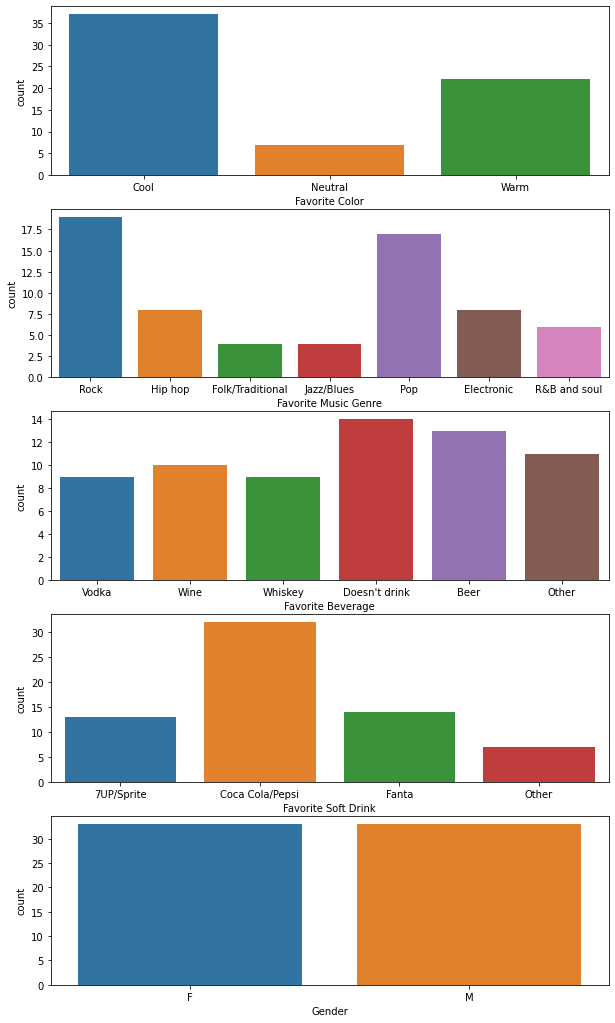

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,18))
for i in range(len(df.columns)):
  sns.countplot(data=df, x=df.iloc[:, i],ax=axes[i])

In [7]:
X = df.drop('Gender', axis=1)
Y = df['Gender']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
cols = list(X.columns)

In [10]:
cols

['Favorite Color',
 'Favorite Music Genre',
 'Favorite Beverage',
 'Favorite Soft Drink']

In [11]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
from sklearn.compose import ColumnTransformer
clt = ColumnTransformer([('binarize', onehot, cols)], remainder = 'passthrough')

In [12]:
X_train = clt.fit_transform(X_train)

In [13]:
X_test = clt.transform(X_test)

CREATING MODEL & METRICS

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_score=[]
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  y_hat = knn.predict(X_test)
  score= 1-accuracy_score(Y_test, y_hat)
  test_score.append(score)



In [19]:
print(Y_test)
print(y_hat)
print(score)

54    M
62    M
0     F
45    M
5     F
63    M
16    F
12    F
65    M
30    F
33    M
9     F
41    M
13    F
34    M
25    F
3     F
17    F
40    M
8     F
6     F
28    F
Name: Gender, dtype: object
['M' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'M' 'M' 'F' 'F' 'M' 'F' 'M' 'M' 'M'
 'F' 'F' 'F' 'M']
0.5909090909090908


In [20]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

**KNN with GridSearchCV**

In [21]:
from sklearn.model_selection import GridSearchCV
n_val = list(range(1,40))
param_grid = {'n_neighbors' :n_val}
model = GridSearchCV(knn, param_grid=param_grid, cv=10, scoring='accuracy')

In [22]:
model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

Best Parameters in KNN using GridSearchCV

In [23]:
model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [24]:
grid_cv_predict = model.predict(X_test)

In [25]:
accuracy_score(Y_test,grid_cv_predict)

0.5454545454545454

Text(0.5, 1.0, 'Mean Test score using KNN')

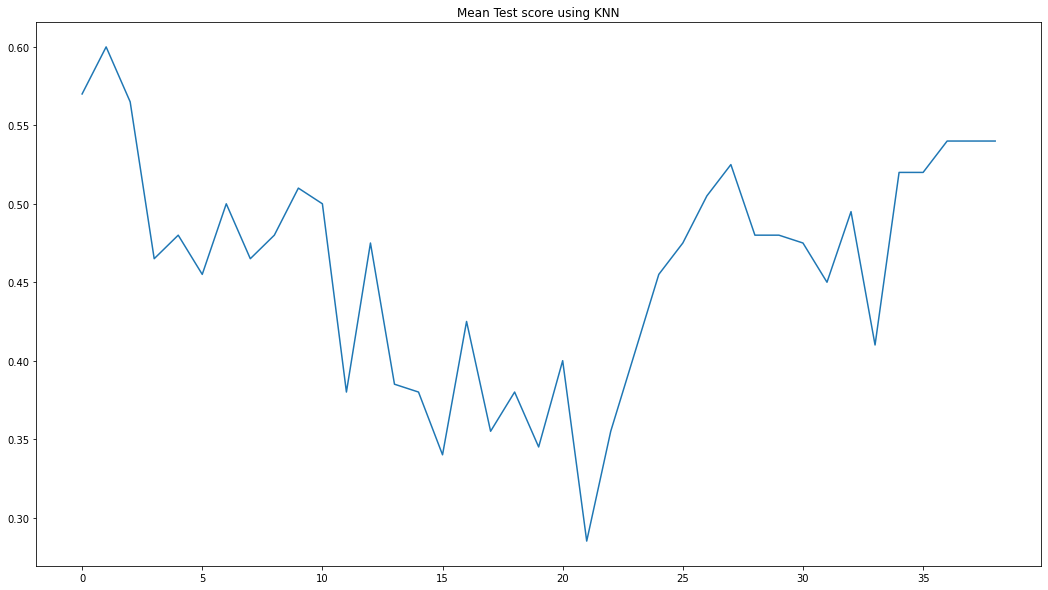

In [26]:
plt.figure (figsize=(18,10))
pd.DataFrame(model.cv_results_)['mean_test_score'].plot()
plt.title('Mean Test score using KNN')

Logistic regression - cross validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV()
logit.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegressionCV()

In [28]:
Logit_pred = model.predict(X_test)
accuracy_score(Y_test, Logit_pred)

0.5454545454545454

Support Vector Machine 

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)
accuracy_score(Y_test, pred_svc)

0.5909090909090909

In [30]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           F       0.75      0.46      0.57        13
           M       0.50      0.78      0.61         9

    accuracy                           0.59        22
   macro avg       0.62      0.62      0.59        22
weighted avg       0.65      0.59      0.59        22



since SVM was able to predict the results at high accuracy compartively, SVM model is selected among other models implemented in the current execution